# <b> <div style='padding:25px;background-color:#9B2335;color:white;border-radius:4px;font-size:100%;text-align: center'>Singapore  Resale Flat Prices Prediction<br> </div>

## <p style="color:Khaki;"> Importing required libraries</p>

In [20]:
import pandas as pd
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import pearsonr,kstest, norm, skew,kurtosis, boxcox
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pickle

sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

color_good = '\033[32m'   # Dark Green for near-zero skew
color_okay = '\033[92m'   # Light Green for slightly positive or slightly negative skew
color_bad = '\033[91m'    # Maroon for significant skew
color_neutral = '\033[0m' # Reset color


## <span style="color:Khaki;">Reading Transformed Dataset

In [21]:
df1=pd.read_feather('df1.feather')

In [22]:
df1.sample(10)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,floors,floor_no,year,full_address,price_per_sqm,remaining_lease_year
121389,1,Bukit Panjang,3 Room,68.0000,Model A,2015,375000.0000,3,6,2022,454 Fajar Rd Bukit Panjang,5514.7059,92
146740,4,Bukit Panjang,4 Room,84.0000,Simplified,1987,180000.0000,3,6,2004,226 Pending Rd Bukit Panjang,2142.8571,82
3615,4,Punggol,4 Room,90.0000,Model A,2003,455000.0000,5,10,2012,107B Edgefield Plains Punggol,5055.5556,90
280996,10,Yishun,5 Room,122.0000,Improved,1988,311000.0000,3,6,1999,367 Yishun Ring Rd Yishun,2549.1803,88
268090,8,Geylang,4 Room,108.0000,Model A,1983,410000.0000,3,6,2008,126 Geylang East Ave 1 Geylang,3796.2963,74
9852,7,Jurong West,4 Room,94.0000,Premium Apartment,2003,425000.0000,3,18,2012,271B Jurong West St 24 Jurong West,4521.2766,90
30192,8,Bukit Merah,4 Room,91.0000,New Generation,1981,535000.0000,3,9,2013,146 Jln Bt Merah Bukit Merah,5879.1209,67
248364,11,Jurong West,3 Room,59.0000,Improved,1978,158000.0000,3,15,2007,187 Boon Lay Ave Jurong West,2677.9661,70
328332,7,Clementi,3 Room,67.0000,New Generation,1978,366000.0000,3,9,2010,331 Clementi Ave 2 Clementi,5462.6866,67
32270,9,Toa Payoh,3 Room,66.0000,Improved,1973,297000.0000,3,6,2013,195 Kim Keat Ave Toa Payoh,4500.0000,59


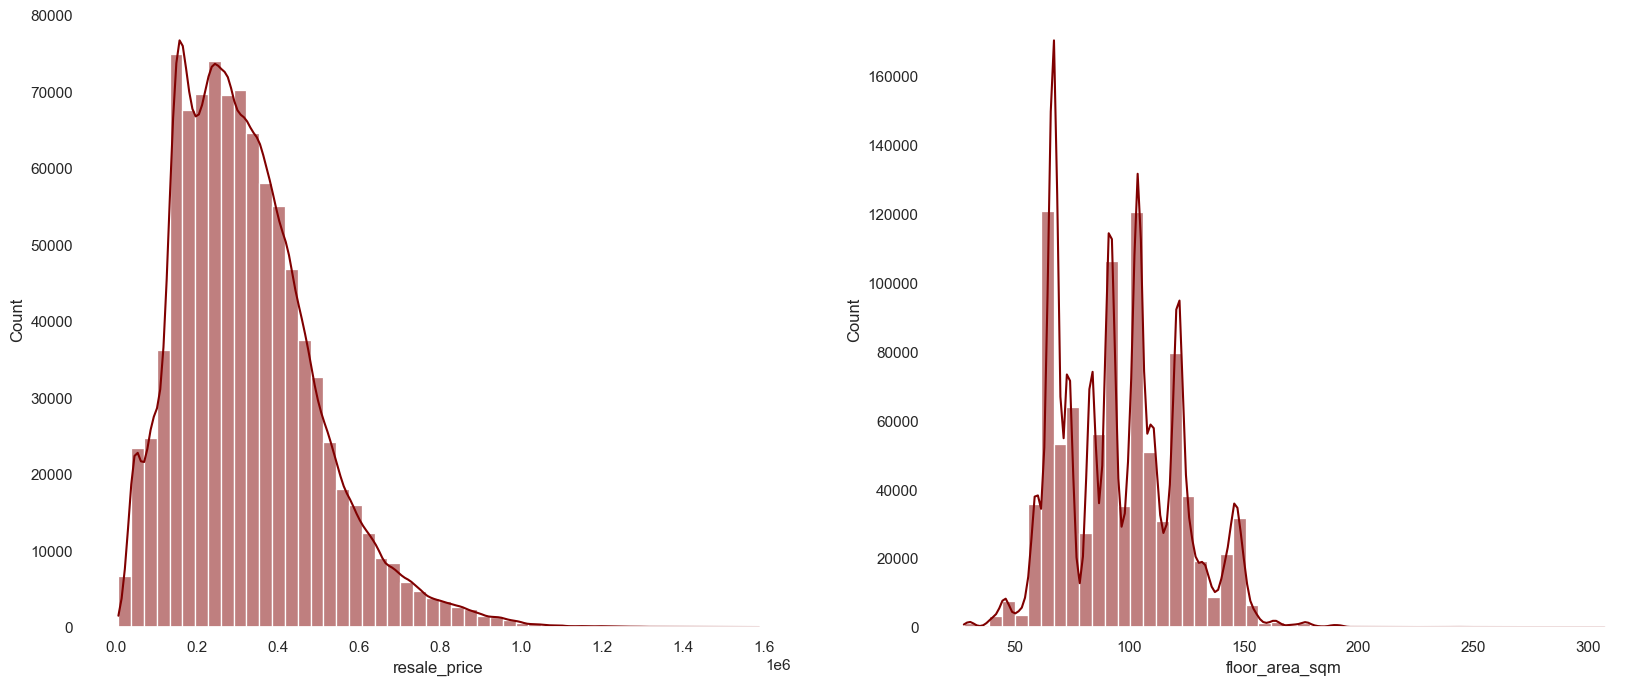

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.histplot(data=df1,x='resale_price',kde=True, bins=50,color='maroon',fill=True)
plt.subplot(1,2,2)
sns.histplot(data=df1,x='floor_area_sqm',kde=True, bins=50,color='maroon',fill=True)
plt.show()

In [24]:
def outlier(df, column,iqr_fact=1.5):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (iqr_fact*iqr)
    lower_threshold = df[column].quantile(0.25) - (iqr_fact*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    return df

In [25]:
df2 = outlier(df1,'floor_area_sqm')
df2 = outlier(df1,'resale_price')

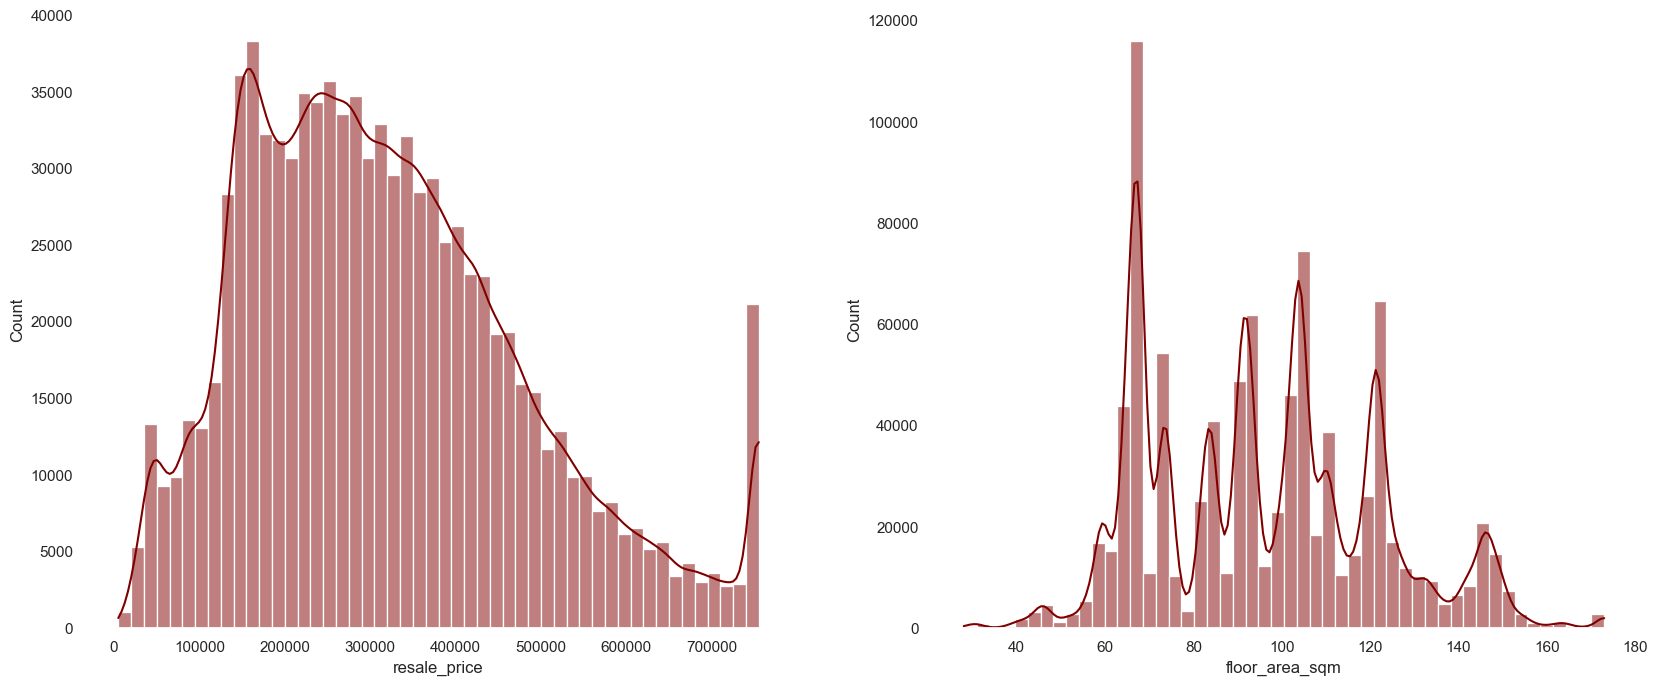

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.histplot(data=df2,x='resale_price',kde=True, bins=50,color='maroon',fill=True)
plt.subplot(1,2,2)
sns.histplot(data=df2,x='floor_area_sqm',kde=True, bins=50,color='maroon',fill=True)
plt.show()


In [28]:
df2.to_feather('df_outlier.feather')